In this practice we are going to predict point x = (4,4) from provided training data by using PCR technique.


Since there is no PCR function in Python then we will do PCA and Linear Regression.

In [396]:
# Import PCA class
from sklearn.decomposition import PCA
# Linear Regression Class
from sklearn.linear_model import LinearRegression
# Plotting graph
import matplotlib.pyplot as plt
# Data Frame for reading CSV to table data
import pandas as pd
import numpy as np

In [397]:
# From given feature x1 and x2 
x1 = [1, 0, 2, 1, 3, 2]
x2 = [0, 1, 1, 2, 2, 3]
y = [1, 1, 2, 2, 3, 3]

# Create pandas columns to visualize data in table
table_data = {"x1": x1, "x2": x2, "y": y}
data = pd.DataFrame(data = table_data)
# show data
data

,x1,x2,y
0,1,0,1
1,0,1,1
2,2,1,2
3,1,2,2
4,3,2,3
5,2,3,3


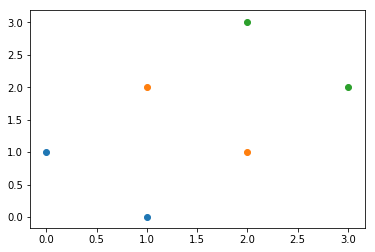

In [398]:
# Plot scatter plot separately according to y result
# This is not classification but we can see how data scatter
plt.scatter(x1[0:2],x2[0:2])
plt.scatter(x1[2:4],x2[2:4])
plt.scatter(x1[4:6],x2[4:6])

In [399]:
# Transform data to x1, x2 pair for training model 
# x = [x1, x2]
x = [[1, 0],[0, 1], [2,1], [1,2], [3,2],[2,3]]
y = [1, 1, 2, 2, 3, 3]

In [400]:
# Reduce dimension by PCA and get 1d data with n-row
pca = PCA(n_components=1)
# Fit input X with PCA
principle_comp = pca.fit_transform(x)
# Check contribution for our maximum eigenvalue
print("contribution: {}".format(pca.explained_variance_ratio_)) 
# See transformed data for selected feature
print("p component:\n", principle_comp)

contribution: [0.72727273]
p component:
 [[ 1.41421356e+00]
 [ 1.41421356e+00]
 [ 1.27159291e-17]
 [-1.27159291e-17]
 [-1.41421356e+00]
 [-1.41421356e+00]]


In [401]:
# Pass new input data after reducing dimention to Linear Regression
# Train regression model on training data 
regr = LinearRegression()
# Train data to the model
regr.fit(principle_comp, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [402]:
# Given observation point
observed_point_x = [[4,4]]
# Reduce dimension to 1 as same as what we have done in PCA above.
reduced_dim_observed_x = pca.transform(observed_point_x)
# Predict
pred = regr.predict(reduced_dim_observed_x)
# See result of prediction
print("input {}, predicted {}".format(X_reduced_test, pred))

input [[-3.53553391]], predicted [4.5]


In [403]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reduced_dim_observed_x, pred)

64.56980515339464